In [ ]:
!pip install tensorflow
!pip install matplotlib
!pip install split-folders
!pip install opencv-python
!pip install -U scikit-learn
!pip install pandas

In [ ]:
pip install --upgrade pip

In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import Input

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import splitfolders
import os   # 리눅스를 파이썬에서 쓰고 싶을 때
import cv2
import matplotlib.cm as cm
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import pandas as pd

## 모델 vgg adam 



In [ ]:
# base_model = VGG16(include_top=False, input_shape = (224, 224, 3), weights = 'imagenet')
# base_model = ResNet50(include_top=False, input_shape = (224, 224, 3), weights = 'imagenet')
base_model = EfficientNetB7(include_top=False, input_shape = (224, 224, 3), weights = 'imagenet')

258076736/258076736 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable =True
# 전체를 True로 하고 일부만 봉쇄
for layer in base_model.layers[:-10]: 
  layer.trainable = False				

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.00001),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

## 모델 불러오기

In [ ]:
model.load_weights('/content/training_3/cp.ckpt')

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]: 
    layer.trainable = False


inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) 

x = tf.keras.layers.Flatten(input_shape=model.output_shape[1:])(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

# predict newdata

In [ ]:
dataset_newdata = []

# 이미지와 라벨 리스트에 담기
for name in os.listdir("/content/newdata"):
    dataset_newdata.append( "/content/newdata/"+name )

dataset_newdata

['/content/newdata/KakaoTalk_20220817_192023857_07.jpg',
 '/content/newdata/KakaoTalk_20220817_192023857_10.jpg',
 '/content/newdata/KakaoTalk_20220817_192023857_02.jpg',
 '/content/newdata/KakaoTalk_20220817_192023857_09.jpg',
 '/content/newdata/KakaoTalk_20220817_192023857_01.jpg',
 '/content/newdata/KakaoTalk_20220817_192023857_08.jpg',
 '/content/newdata/KakaoTalk_20220817_192023857_06.jpg',
 '/content/newdata/KakaoTalk_20220817_192023857_05.jpg',
 '/content/newdata/KakaoTalk_20220817_192023857_04.jpg',
 '/content/newdata/KakaoTalk_20220817_192023857_03.jpg',
 '/content/newdata/KakaoTalk_20220817_192023857_11.jpg',
 '/content/newdata/KakaoTalk_20220817_192023857.jpg']

In [ ]:
for filename in dataset_newdata:
    img = cv2.imread(filename)

    percent = 1
    if(img.shape[1] > img.shape[0]) :      
        percent = 224/img.shape[1] 
    else :
        percent = 224/img.shape[0]
    img = cv2.resize(img, dsize=(0, 0), fx=percent, fy=percent, interpolation=cv2.INTER_LINEAR)
    y,x,h,w = (0,0,img.shape[0], img.shape[1])

    w_x = (224-(w-x))/2  
    h_y = (224-(h-y))/2

    if(w_x < 0):  
        w_x = 0
    elif(h_y < 0):
        h_y = 0

    M = np.float32([[1,0,w_x], [0,1,h_y]]) 
    img_re = cv2.warpAffine(img, M, (224, 224)) 

    cv2.imwrite('resized/newdata/{0}'.format(filename.split("/")[-1]) , img_re)

In [ ]:
x_newdata = []

for name in os.listdir("/content/resized/newdata"):
    print(name)
    image = cv2.imread( "/content/resized/newdata/"+name ) 
    x_newdata.append( image )

# x_newdata

KakaoTalk_20220817_192023857_07.jpg
KakaoTalk_20220817_192023857_10.jpg
KakaoTalk_20220817_192023857_02.jpg
KakaoTalk_20220817_192023857_09.jpg
KakaoTalk_20220817_192023857_01.jpg
KakaoTalk_20220817_192023857_08.jpg
KakaoTalk_20220817_192023857_06.jpg
KakaoTalk_20220817_192023857_05.jpg
KakaoTalk_20220817_192023857_04.jpg
KakaoTalk_20220817_192023857_03.jpg
KakaoTalk_20220817_192023857_11.jpg
KakaoTalk_20220817_192023857.jpg


In [ ]:
# array로 형변환
x_newdata = np.array(x_newdata)

In [ ]:
x_newdata = x_newdata.astype('float32')

In [ ]:
x_newdata.shape

(12, 224, 224, 3)

In [ ]:
my_predict = model.predict(x_newdata)
my_predict

1/1 [==============================] - 2s 2s/step


array([[1.00000000e+00, 1.80170047e-13, 5.91916088e-22],
       [1.60643784e-03, 9.98393595e-01, 3.86820354e-09],
       [4.21968302e-19, 1.00000000e+00, 3.33769976e-27],
       [1.00000000e+00, 4.91115237e-08, 7.35676490e-16],
       [4.98689241e-12, 1.00000000e+00, 1.13145352e-18],
       [1.35115869e-07, 9.99999881e-01, 9.61728188e-14],
       [1.00000000e+00, 1.76852240e-08, 1.02205265e-14],
       [1.00000000e+00, 2.91879254e-09, 2.58348331e-15],
       [1.00000000e+00, 1.26209953e-15, 1.67086846e-23],
       [1.00000000e+00, 1.62987868e-09, 6.32236192e-16],
       [1.00000000e+00, 6.30843338e-17, 4.84084556e-26],
       [2.00881436e-01, 7.99118578e-01, 7.44036655e-09]], dtype=float32)

In [ ]:
label2index = {'man' : 0, 'woman' : 1}

In [ ]:
list_predict = my_predict.tolist()

for idx, i in enumerate( list_predict ):
  dataset_newdata[idx]
  print(i[0])
  print(i[1])
  print(i[2])
  print("\n")

1.0
1.8017004717579138e-13
5.919160878122941e-22


0.0016064378432929516
0.9983935952186584
3.868203535262182e-09


4.219683017131806e-19
1.0
3.3376997641252556e-27


1.0
4.9111523736655727e-08
7.356764902940929e-16


4.986892409436505e-12
1.0
1.1314535208091007e-18


1.3511586871572945e-07
0.9999998807907104
9.61728187864018e-14


1.0
1.7685223951957596e-08
1.0220526546400252e-14


1.0
2.918792540995696e-09
2.583483311652322e-15


1.0
1.26209952607876e-15
1.670868455092167e-23


1.0
1.6298786764679107e-09
6.322361915006873e-16


1.0
6.308433384631562e-17
4.840845561186321e-26


0.20088143646717072
0.7991185784339905
7.440366545097277e-09




# confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = [0,1,2,1,2,1,0,0,2,2,1,2]
y_pred = [2,1,2,1,0,1,0,0,2,1,1,2]
matrix = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

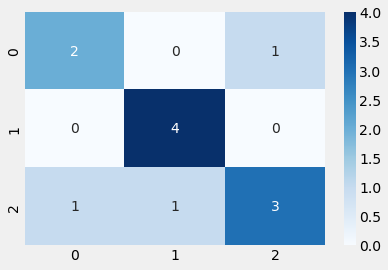

In [ ]:
import numpy as np
import seaborn as sns

sns.heatmap(matrix, annot=True, cmap='Blues');  # cmap='OrRd'

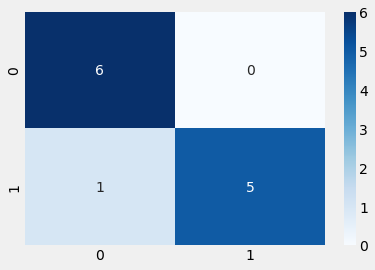

In [ ]:


y_true = [0,1,1,1,1,1,0,0,0,0,0,1]
y_pred = [0,1,1,0,1,1,0,0,0,0,0,1]
matrix = confusion_matrix(y_true, y_pred, labels=[0, 1])

sns.heatmap(matrix, annot=True, cmap='Blues');  # cmap='OrRd'

In [ ]:
from sklearn.metrics import confusion_matrix

# 스타일
# y_true = [0,1,2,1,2,1,0,0,2,2,1,2]
# y_pred = [2,1,2,1,0,1,0,0,2,1,1,2]

# 성별
y_true = [0,1,1,1,1,1,0,0,0,0,0,1]
y_pred = [0,1,1,0,1,1,0,0,0,0,0,1]

print(classification_report(y_true,y_pred ))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



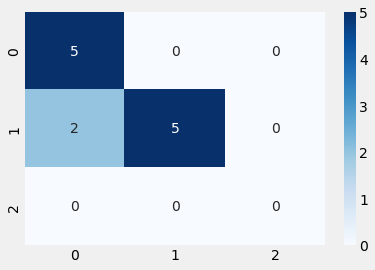

In [ ]:
y_true_label = [0,0,0,1,1,0,1,1,1,0,1,1]
y_pred_label = [0,0,0,1,1,0,1,0,1,0,0,1]
matrix = confusion_matrix(y_true_label, y_pred_label, labels=[0, 1, 2])

sns.heatmap(matrix, annot=True, cmap='Blues');  # cmap='OrRd'

In [ ]:
# 계절
y_true_label = [0,0,0,1,1,0,1,1,1,0,1,1]
y_pred_label = [0,0,0,1,1,0,1,0,1,0,0,1]

print(classification_report(y_true_label, y_pred_label ))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.71      0.83         7

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12

